## Tutorial exponential grow (synthetic data)

In this example, we create a synthenic (i.e. invented) data set, for which we assume pure exponential growth. 

In more detail, for the number of daily new cases $n_d(t)$ as a function of day index $t$, we compute

$$ n_d(t) = n_0 R^{t/\tau} $$

with $n_0$ being the initial number of infections, $R$ the reproduction number and $\tau$ the serial interval.

We use an R-number of 1.5, assume there are 10 infections in the beginning, and that the serial interval is 4 days. The we plot the 'usual' plots for OSCOVIDA. The numbers can be changed below, of course.


In [1]:
import oscovida as ov
ov.display_binder_link("tutorial-exponential-growth-example.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-exponential-growth-example.ipynb)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


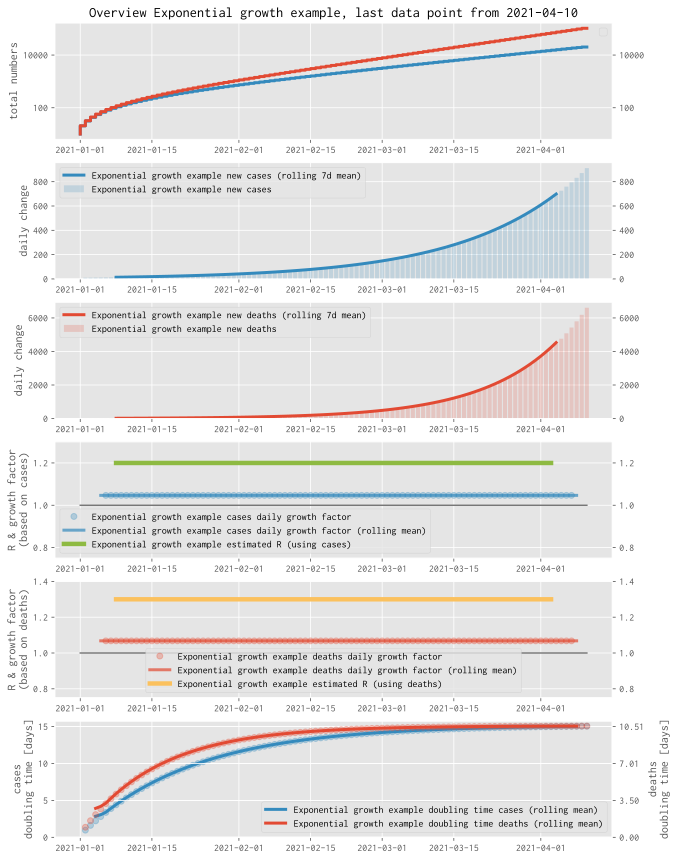

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np
import pandas as pd

days = 100
n0 = 10   # initial infections
R = 1.2   # R number for infections
tau = 4   # serial interval

dates = pd.date_range("2021-01-01", periods=days, freq='D')

t = np.arange(0, days, 1)

# we need to compute the cumulutive sum of exponential growth
# as the exponential   growth equation describes the daily change
# and oscovida expects by default the cumulutive sum of these daily changes
# (and that is also the observable reported by many data sources)
cases = pd.Series(n0*R**(t/tau), index=dates).cumsum()

# if we turn our synthetic data from real numbers to integers, 
# then the R-number reconstruction for the first few days is not quite 
# a flat line. This can be tested here by uncommenting the next line:
#cases = cases.astype(int)  

# for deaths, we assume a different R (just to check the computation
# of R in oscovida works). 
Rdeath = 1.3
deaths = pd.Series(n0*Rdeath**(t/tau), index=dates).cumsum()

# optionally turn deaths into integer numbers
#deaths = deaths.astype(int)

ax, _, _ = ov.overview(country="Exponential growth example", 
                       data=(cases, deaths));

Plot 1: We see that the exponential growth appears as a straight line in the logarithmic plot.

Plot 2 and 3: Here the exponential curve of the daily cases and deaths is visible.

Plot 4: The green line rows the R number, and shows that this is 1.2 (as in the variable `R` when we created the synthetic data above. In the reconstruction of `R`, we assume the serial interval $\tau$ =`tau` of 4 days: if `tau` is changed in the creation of the data, the reconstruction of the value `R` will give different results because it assumes `tau=4`. (see `compute_R` in this [oscovida.py file](https://github.com/oscovida/oscovida/blob/master/oscovida/oscovida.py#L1064))

The blue line shows the day-to-day growth factor $c$ of the daily new changes. So the daily new cases are given by $c$ multiplied with the cases from the day before:

In [3]:
daily_cases = cases.diff()
daily_cases[6]/daily_cases[5]

1.046635139392105

From the equation, we can also work out the general result for exponential growth and find (the same number):

In [4]:
R**(1/tau)

1.0466351393921056

Plot 5 shows the same entities for deaths rather than cases.

Plot 6 shows the doubling time of the *cumulative* number of cases. 

The doubling time of the *daily cases* can be computed (assuming exponential growth) using the oscovida function `double_time_exponential` (see [Wikipedia for equation](https://en.wikipedia.org/wiki/Doubling_time)). It needs as input the ratio of data points 2 and 1 (such as $n_d(2) / n_d(1) $), and the number of days between those two data points $t_2$ and $t_1$:

In [5]:
ov.double_time_exponential(daily_cases[6]/daily_cases[5], 1)

15.207136067695913

In [6]:
ov.double_time_exponential(daily_cases[60]/daily_cases[5], 55)

15.207136067695723

Because this is perfect exponential growth, we get the same doubling time irrespective of which two data points we base this on.

What is shown in plot 6 now is the doubling time of the *cumulative* cases. This does not show exponential growth and in particular the doubling time changes. 

In [7]:
ov.double_time_exponential(cases[2]/cases[1], 1)

1.6169034998130376

In [8]:
ov.double_time_exponential(cases[99]/cases[98], 1)

15.044036674288074

If we only plot the last few weeks of the data, the exponential growth is harder to see:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


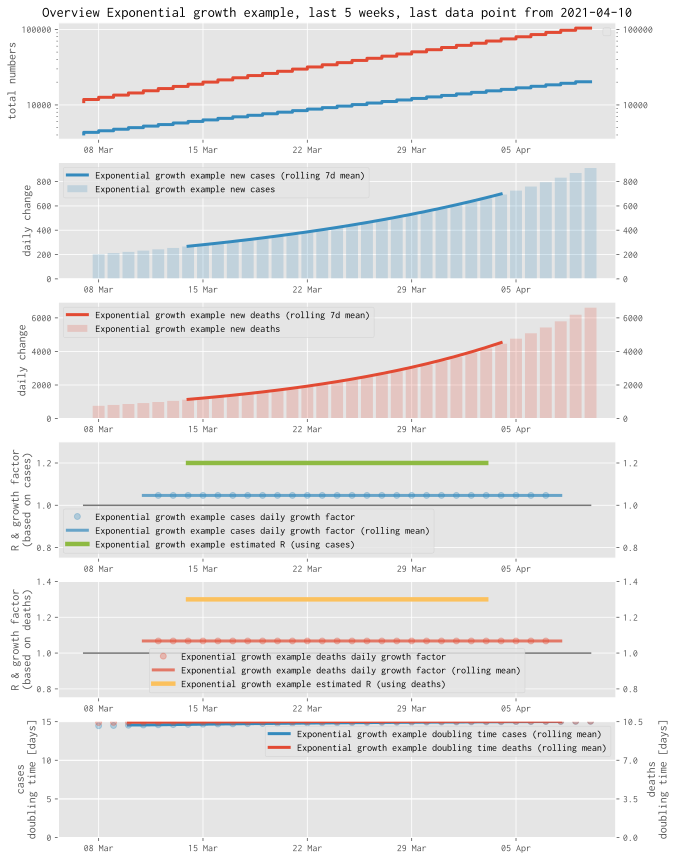

In [9]:
ax, _, _ = ov.overview(country="Exponential growth example", region="region", subregion="subregion", 
                       weeks=5, data=(cases, deaths));